## Q learning formule de Bellman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from fonctions import *

In [2]:
env

array([[0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [3]:
# Initialisation des paramètres

#q_table = np.zeros((grid_size, grid_size))  # Q-valeurs
q_table = np.zeros((grid_size, grid_size, len(actions))) 
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Taux de discount
epsilon = 0.1  # Exploration/exploitation
q_table.shape

(10, 10, 4)

In [4]:
episodes = 1000
##episodes,alpha,gamma,epsilon,q_table,strawberries=None
q_table = q_learning(episodes,alpha,gamma,epsilon,q_table)

In [7]:
optimal_path = find_optimal_path(q_table, (0,0), goal)
print("Chemin valide :", optimal_path)


Chemin valide : [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (4, 6), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9), (9, 9)]


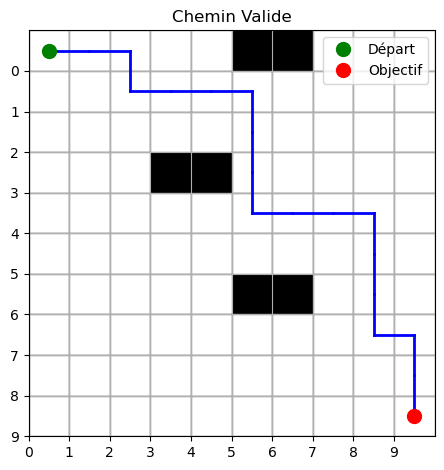

In [9]:
# Création des sous-graphiques
fig, ax = plt.subplots()

# Chemin optimal
visualize_path(ax,env, optimal_path, "Chemin Valide")
plt.tight_layout()
plt.show()

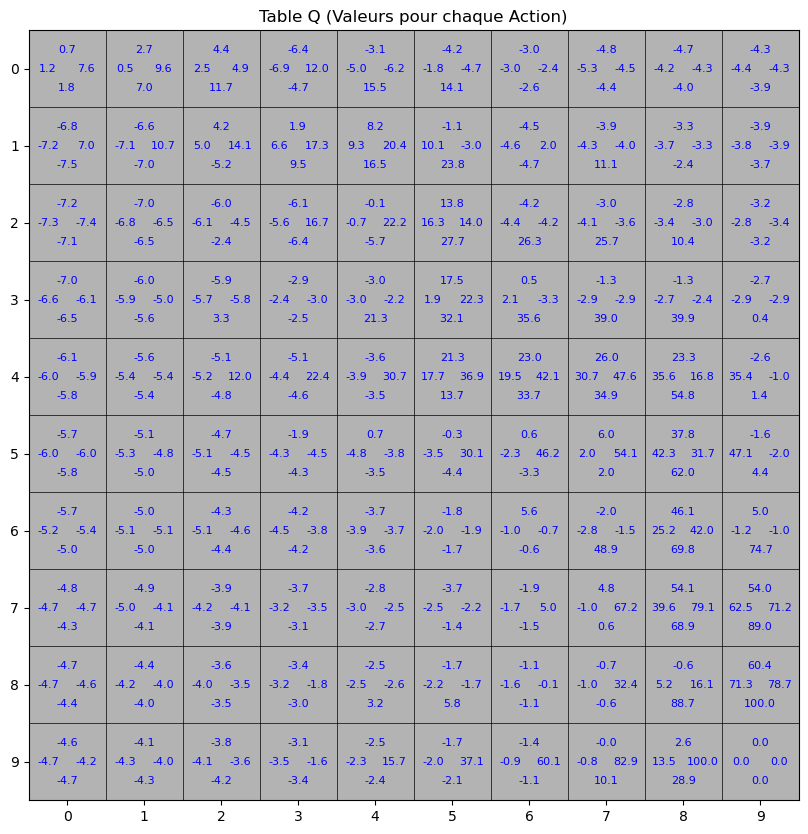

In [10]:
visualize_q_table(q_table)

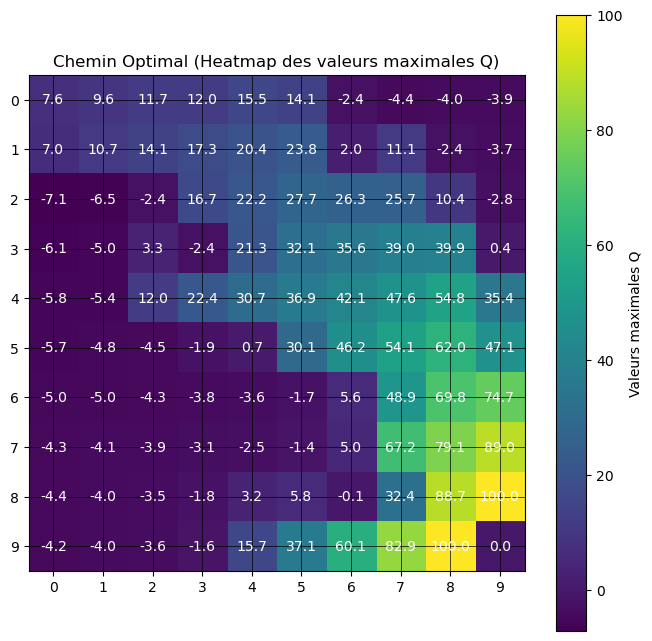

In [11]:
# Visualiser la heatmap des valeurs optimales
visualize_Heatmap_optimal_path(q_table)


## Greedy Q learning (cours)

In [12]:
Q = np.zeros((grid_size, grid_size, len(actions))) 
Q.shape

(10, 10, 4)

In [ ]:
# Définir les récompenses
def get_reward2(state):
    x, y = state
    if env[x, y] == 1:  # Obstacle
        return -10
    elif (x, y) == (9, 9):  # Objectif
        return 10
    else:
        return 1 / (abs(x - goal[0]) + abs(y - goal[1]) )

# Q-learning
def train_q_algorithm(episodes, Q):
    for episode in range(episodes):
        state = (0, 0)
        while state != (9, 9):
            # Choisir une action
            action_index = np.argmax(Q[state[0], state[1], :])  # Exploitation
            
            action = actions[action_index]
            next_state = take_action(state, action)
            reward = get_reward2(next_state)
            
            # Mettre à jour la Q-valeur
            Q[state[0], state[1], action_index] += reward + gamma * np.max(Q[next_state[0], next_state[1], :])
            print("La state est ",state)
            print("l'entrainement est dans la state de ",Q[state[0], state[1], :])
            
            state = next_state
    return Q
episodes = 10
Q = train_q_algorithm(episodes, Q)


La state est  (0, 0)
l'entrainement est dans la state de  [0.05555556 0.         0.         0.        ]
La state est  (0, 0)
l'entrainement est dans la state de  [0.16111111 0.         0.         0.        ]
La state est  (0, 0)
l'entrainement est dans la state de  [0.36166667 0.         0.         0.        ]
La state est  (0, 0)
l'entrainement est dans la state de  [0.74272222 0.         0.         0.        ]
La state est  (0, 0)
l'entrainement est dans la state de  [1.46672778 0.         0.         0.        ]
La state est  (0, 0)
l'entrainement est dans la state de  [2.84233833 0.         0.         0.        ]
La state est  (0, 0)
l'entrainement est dans la state de  [5.45599839 0.         0.         0.        ]
La state est  (0, 0)
l'entrainement est dans la state de  [10.42195249  0.          0.          0.        ]
La state est  (0, 0)
l'entrainement est dans la state de  [19.85726529  0.          0.          0.        ]
La state est  (0, 0)
l'entrainement est dans la state de

C:\Users\acer\AppData\Local\Temp\ipykernel_13236\243648449.py:24: RuntimeWarning: overflow encountered in scalar add
  Q[state[0], state[1], action_index] += reward + gamma * np.max(Q[next_state[0], next_state[1], :])


La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est  (0, 0)
l'entrainement est dans la state de  [inf  0.  0.  0.]
La state est

KeyboardInterrupt: 